Seung Pang (sp4232) Content Based Book Recommendation Systems 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
books = pd.read_csv("/content/drive/MyDrive/Books.csv")
books.head(15) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [100]:
ratings = pd.read_csv("/content/drive/MyDrive/Ratings.csv")
ratings.head(20)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [4]:
users = pd.read_csv("/content/drive/MyDrive/Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#get rating data given user-id
ratings.loc[ratings['User-ID'] == 276729]

,User-ID,ISBN,Book-Rating
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books['Book-Title'].loc[books['ISBN'] == '0521795028']

246839    The Amsterdam Connection : Level 4 (Cambridge ...
Name: Book-Title, dtype: object

In [5]:
#Explore the given data 

#271360 books- (271360, 8)
books.shape 

#278858 users- (278858, 3)
users.shape 

#1149780 ratings- (1149780, 3)
ratings.shape 

(1149780, 3)

6.119295400943396

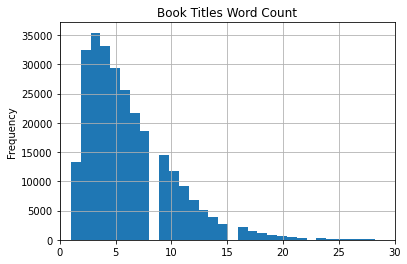

In [8]:
#Book title word count distribution
#https://www.kdnuggets.com/2020/07/building-content-based-book-recommendation-engine.html
#Plot the word count

books['word_count'] = books['Book-Title'].apply(lambda x: len(str(x).split()))
books['word_count'].plot(
    kind='hist',
    bins = 50,
    grid = True,
    xlim = ([0, 30]),
    title='Book Titles Word Count')

#On average, a book title has about 6 words 
books['word_count'].mean(axis=0)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
#1) stemming to chop off suffixes
stemmer = SnowballStemmer('english')
stemmed_book_title=[' '.join([stemmer.stem(word) for word in text.split(' ')])
          for text in books['Book-Title']]

In [11]:
#2)lemmeatizing
lemmatizer = WordNetLemmatizer()
 
lemmed_book_title=[' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
          for text in stemmed_book_title]

In [12]:
#TF-IDF Vectorizer on book titles
tf_idf = TfidfVectorizer(analyzer = 'word', min_df = 0.003, 
                         ngram_range = (1,2), stop_words='english')
book_title = tf_idf.fit_transform(lemmed_book_title)

In [13]:
#book_title matrix is sparse -> make dense
book_matrix = book_title.todense()
book_matrix.shape

(271360, 164)

In [14]:
#min_df=1, (271360, 569779)
#min_df=0.005, (271360, 73)
#min_df=0.003, (271360, 164)
book_title.shape 

(271360, 164)

In [15]:
#vectorizer.get_feature_names_out()
features = tf_idf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
book_matrix_df = pd.DataFrame(book_matrix, columns=tf_idf.get_feature_names(), index=books['Book-Title'])
book_matrix_df.head(15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adventur,age,america,american,amp,angel,anim,art,babi,best,...,way,white,wild,woman,word,work,world,write,year,young
Book-Title,,,,,,,,,,,,,,,,,,,,,
Classical Mythology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
The Kitchen God's Wife,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
What If?: The World's Foremost Military Historians Imagine What Might Have Been,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
PLEADING GUILTY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Under the Black Flag: The Romance and the Reality of Life Among the Pirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Cosine similarity between book titles
#Cosine similarity - measurement of similarity between two or more vectors
#https://towardsdatascience.com/understanding-cosine-similarity-and-its-application-fd42f585296a

from sklearn.metrics.pairwise import cosine_similarity
books_cos_sim = linear_kernel(book_matrix_df[:15000], book_matrix_df[:15000])
books_cos_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
#book_matrix_df to series: index, book_title 
indices = pd.Series(book_matrix_df.index)

In [26]:
#get user id, return given rating, and book title 
def user_rated_book(uid):
  ratingdf = ratings.loc[ratings['User-ID'] == uid]

  #find the corresponding book titles: books['ISBN'] == ratings['ISBN']
  data = []
  for x in ratingdf['ISBN']:
    data.append(list(books['Book-Title'].loc[books['ISBN'] == x]))
    #print(books['Book-Title'].loc[books['ISBN'] == x])

  #create dataframe title-rating
  df = pd.DataFrame(list(ratingdf['Book-Rating']), columns = ['rating'])
  df['title'] = data 
  return df

In [101]:
user_rated_book(276746)

,rating,title
0,0,[Lightning]
1,0,[Manhattan Hunt Club]
2,0,[Dark Paradise]
3,0,[Night Sins]
4,0,[At the Edge]
5,0,[Make Them Cry]


In [102]:
title = user_rated_book(276746)['title'][0][0]
print(str(title))

Lightning


In [103]:
#get index of the given book title
#title = "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)"
index = indices[indices == title].index[0]

In [104]:
#recommend top 5 books
#https://youtu.be/PlQZepYEppQ
recommend_book = []
sim_score = pd.Series(books_cos_sim[index]).sort_values() 
top_5_books = list(sim_score.iloc[1:6].index)
for i in top_5_books: 
  recommend_book.append([i, list(book_matrix_df.index)[i], sim_score.iloc[i]])

In [105]:
recommend_book
df = pd.DataFrame(recommend_book, columns =['Index', 'Book-Title', 'Similarity Score'])
df

,Index,Book-Title,Similarity Score
0,9992,The Exploits of the Incomparable Mulla Nasrudi...,0.0
1,9993,The Hours : A Novel,0.0
2,9994,Beloved (Penguin Great Books of the 20th Century),0.0
3,9995,Read This and Tell Me What It Says : Stories (...,0.0
4,9996,The Star Rover,0.0
